PROJECT 1

Stock Market Analysis Using Python

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import yfinance as yf
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

In [25]:
#Stock market analysis using Python for Amazon
stk_sym= "AMZN"
strt_dt= "2020-01-01"
end_dt= "2023-01-01"

#CREATE EMPTY DATAFRAME TO STORE STOCK DATA
amazon_data= pd.DataFrame()

#FETCH DATA FROM TECHNOLOGY STOCK & STRORE IT IN DATAFRAME(TASK1)
amazon=yf.download(stk_sym, start=strt_dt, end=end_dt)
amazon_data= pd.DataFrame(amazon)

[*********************100%%**********************]  1 of 1 completed


In [26]:
print(amazon)

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-01-02  93.750000  94.900497  93.207497  94.900497  94.900497  80580000
2020-01-03  93.224998  94.309998  93.224998  93.748497  93.748497  75288000
2020-01-06  93.000000  95.184502  93.000000  95.143997  95.143997  81236000
2020-01-07  95.224998  95.694504  94.601997  95.343002  95.343002  80898000
2020-01-08  94.902000  95.550003  94.321999  94.598503  94.598503  70160000
...               ...        ...        ...        ...        ...       ...
2022-12-23  83.250000  85.779999  82.930000  85.250000  85.250000  57433700
2022-12-27  84.970001  85.349998  83.000000  83.040001  83.040001  57284000
2022-12-28  82.800003  83.480003  81.690002  81.820000  81.820000  58228600
2022-12-29  82.870003  84.550003  82.550003  84.180000  84.180000  54995900
2022-12-30  83.120003  84.050003  82.470001  84.000000  84.000000  62401200

[756 rows x

In [22]:
#PERFORM CLEANING(TASK2)
missing_data=amazon_data.isnull()
print("Missing Data: ")
print(missing_data)

Missing Data: 
             Open   High    Low  Close  Adj Close  Volume
Date                                                     
2020-01-02  False  False  False  False      False   False
2020-01-03  False  False  False  False      False   False
2020-01-06  False  False  False  False      False   False
2020-01-07  False  False  False  False      False   False
2020-01-08  False  False  False  False      False   False
...           ...    ...    ...    ...        ...     ...
2022-12-23  False  False  False  False      False   False
2022-12-27  False  False  False  False      False   False
2022-12-28  False  False  False  False      False   False
2022-12-29  False  False  False  False      False   False
2022-12-30  False  False  False  False      False   False

[756 rows x 6 columns]


In [27]:
#CHECKING & REMOVING DUPLICATES
duplicate= amazon_data.duplicated()
amazon_data.drop_duplicates(inplace= True)
print("\nNumber of Duplicates:", duplicate)


Number of Duplicates: Date
2020-01-02    False
2020-01-03    False
2020-01-06    False
2020-01-07    False
2020-01-08    False
              ...  
2022-12-23    False
2022-12-27    False
2022-12-28    False
2022-12-29    False
2022-12-30    False
Length: 756, dtype: bool


In [29]:
#CALCULATING CHANGE IN STOCK PRICE OVER TIME(TASK4)
amazon['Daily Change'] = amazon['Adj Close'].diff()
print(amazon['Daily Change'])

Date
2020-01-02         NaN
2020-01-03   -1.152000
2020-01-06    1.395500
2020-01-07    0.199005
2020-01-08   -0.744499
                ...   
2022-12-23    1.459999
2022-12-27   -2.209999
2022-12-28   -1.220001
2022-12-29    2.360001
2022-12-30   -0.180000
Name: Daily Change, Length: 756, dtype: float64


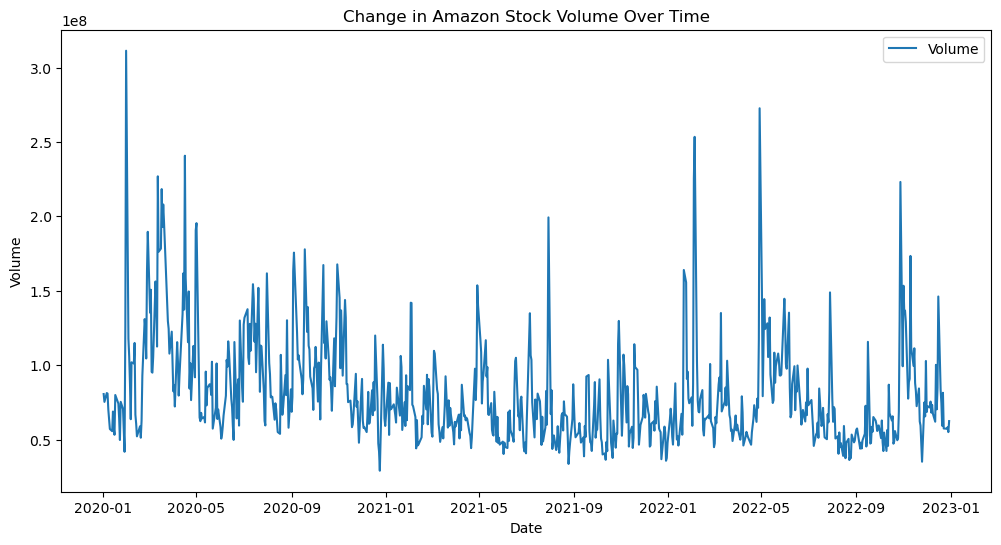

In [31]:
#PLOTTING THE STOCK VOLUME OVER TIME(TASK5)
plt.figure(figsize=(12, 6))
plt.plot(amazon.index, amazon['Volume'], label='Volume')
plt.title('Change in Amazon Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [33]:
#CALCULATING THE 100-DAY MOVING AVERAGE(TASK6)
amazon['100-Day MA'] = amazon['Adj Close'].rolling(window=100).mean()
print(amazon['100-Day MA'])

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
                ...   
2022-12-23    112.2975
2022-12-27    111.7022
2022-12-28    111.1124
2022-12-29    110.5601
2022-12-30    110.0218
Name: 100-Day MA, Length: 756, dtype: float64


In [34]:
#CALCULATING DAILY RETURN(TASK7)
amazon['Daily Return'] = (amazon['Adj Close'] / 
                          amazon['Adj Close'].shift(1)) - 1
print(amazon['Daily Return'])

Date
2020-01-02         NaN
2020-01-03   -0.012139
2020-01-06    0.014886
2020-01-07    0.002092
2020-01-08   -0.007809
                ...   
2022-12-23    0.017425
2022-12-27   -0.025924
2022-12-28   -0.014692
2022-12-29    0.028844
2022-12-30   -0.002138
Name: Daily Return, Length: 756, dtype: float64


In [36]:
#ADDING A NEW COLUMN 'TREND' BASED ON DAILY RETURN(TASK8)
amazon['Trend'] = np.where(amazon['Daily Return'] > 0, 'Up', 'Down')
print(amazon['Trend'])
print(amazon)

Date
2020-01-02    Down
2020-01-03    Down
2020-01-06      Up
2020-01-07      Up
2020-01-08    Down
              ... 
2022-12-23      Up
2022-12-27    Down
2022-12-28    Down
2022-12-29      Up
2022-12-30    Down
Name: Trend, Length: 756, dtype: object
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2020-01-02  93.750000  94.900497  93.207497  94.900497  94.900497  80580000   
2020-01-03  93.224998  94.309998  93.224998  93.748497  93.748497  75288000   
2020-01-06  93.000000  95.184502  93.000000  95.143997  95.143997  81236000   
2020-01-07  95.224998  95.694504  94.601997  95.343002  95.343002  80898000   
2020-01-08  94.902000  95.550003  94.321999  94.598503  94.598503  70160000   
...               ...        ...        ...        ...        ...       ...   
2022-12-23  83.250000  85.779999  82.930000  85.250000  85.250000  57433700   
2022-12-27  84.970001  85.349998  8

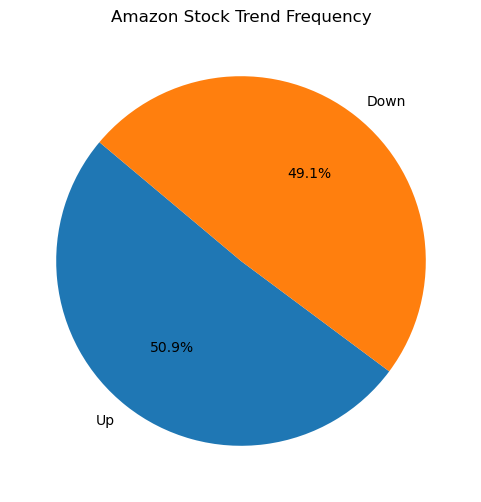

In [37]:
#VISUALISING TREND FREQUENCY WITH A PIE CHART(TASK9)
trend_counts = amazon['Trend'].value_counts()

# CREATING A PIE CHART
plt.figure(figsize=(6, 6))
plt.pie(trend_counts, labels=trend_counts.index,
        autopct='%1.1f%%', startangle=140)
plt.title('Amazon Stock Trend Frequency')
plt.show()

In [3]:
#LIST OF TECHNOLOGY STOCKS
techlst= ["AAPL", "GOOGL", "AMZN", "MSFT"]

#ASSIGN START & END DATE FOR DATA
strt_dt= "2020-01-01"
end_dt= "2023-01-01"

#CREATE EMPTY DATAFRAME TO STORE STOCK DATA
stk_data= pd.DataFrame()

TASK 1 :- Read the Data from Yahoo finance website directly.

In [4]:
#FETCH DATA FROM TECHNOLOGY STOCK & STRORE IT IN DATAFRAME
for stk_sym in techlst:
    stk=yf.download(stk_sym, start=strt_dt, end=end_dt)
    stk_data[stk_sym]= stk["Adj Close"]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
print(stk)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02  158.779999  160.729996  158.330002  160.619995  155.093719   
2020-01-03  158.320007  159.949997  158.059998  158.619995  153.162491   
2020-01-06  157.080002  159.100006  156.509995  159.029999  153.558411   
2020-01-07  159.320007  159.669998  157.320007  157.580002  152.158264   
2020-01-08  158.929993  160.800003  157.949997  160.089996  154.581924   
...                ...         ...         ...         ...         ...   
2022-12-23  236.110001  238.869995  233.940002  238.729996  237.112076   
2022-12-27  238.699997  238.929993  235.830002  236.960007  235.354095   
2022-12-28  236.889999  239.720001  234.169998  234.529999  232.940552   
2022-12-29  235.649994  241.919998  235.649994  241.009995  239.376633   
2022-12-30  238.210007  239.960007  236.660004  239.820007  238.194717   

              Volume  
Date          

TASK 2:- Perform cleaning.

In [6]:
for stk_sym in techlst:
    stk
    stk_data[stk_sym]= stk["Adj Close"]
    
#CHECKING MISSING DATA
missing_data= stk_data.isnull().sum()
print("Missing Data: ")
print(missing_data)

Missing Data: 
AAPL     0
GOOGL    0
AMZN     0
MSFT     0
dtype: int64


In [8]:
#CHECKING & REMOVING DUPLICATES
duplicate= stk_data.duplicated().sum()
stk_data.drop_duplicates(inplace= True)
print("\nNumber of Duplicates:", duplicate)


Number of Duplicates: 0


TASK 3:- What was the change in stock price over time?

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


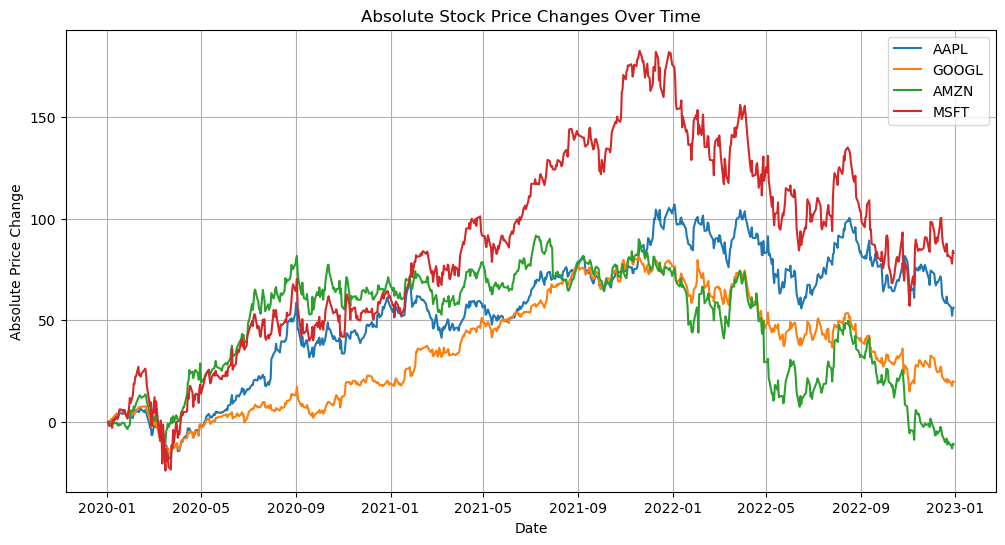

In [9]:
for stk_sym in techlst:
    stk = yf.download(stk_sym, start=strt_dt, end=end_dt)
    stk_data[stk_sym] = stk["Adj Close"]

#CALCULATING AND PLOTTING CHANGES IN STOCK PRICE OVER TIME
plt.figure(figsize=(12, 6))
for stk_sym in techlst:
    stk_price_change = stk_data[stk_sym] - stk_data[stk_sym].iloc[0]
    plt.plot(stk_data.index, stk_price_change, label=stk_sym)

plt.title("Absolute Stock Price Changes Over Time")
plt.xlabel("Date")
plt.ylabel("Absolute Price Change")
plt.legend()
plt.grid(True)
plt.show()


TASK 4:- Visualize the change in a stock’s volume being traded, over time?

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


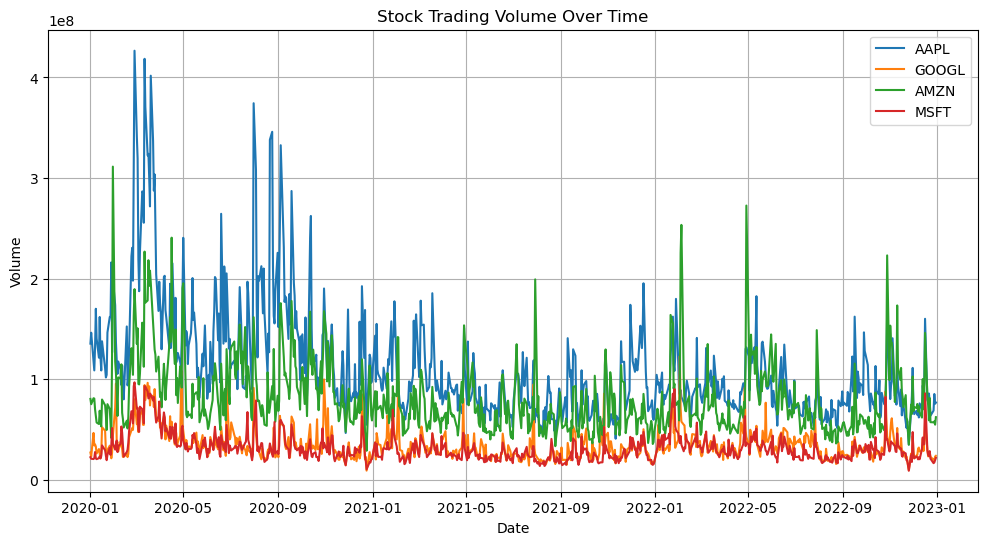

In [10]:
#CREATING AN EMPTY DATAFRAME TO STORE STOCK VOLUME DATA
vol_data = pd.DataFrame()
for stk_sym in techlst:
    stk = yf.download(stk_sym, start=strt_dt, end=end_dt)
    vol_data[stk_sym] = stk["Volume"]

# Plot the trading volume over time
plt.figure(figsize=(12, 6))
for stk_sym in techlst:
    plt.plot(vol_data.index, vol_data[stk_sym], label=stk_sym)

plt.title("Stock Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.show()

TASK 5:- What was the moving average of various stocks?

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


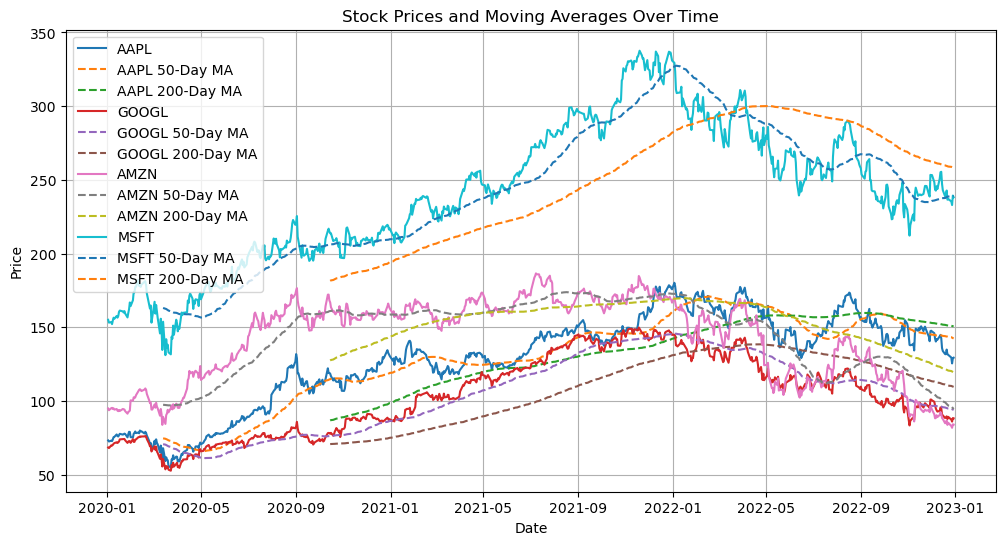

In [43]:
tech_stocks = ["AAPL", "GOOGL", "AMZN", "MSFT"]

start_date = "2020-01-01"
end_date = "2023-01-01"

stock_data = pd.DataFrame()

for stock_symbol in tech_stocks:
    stock = yf.download(stock_symbol, start=start_date, end=end_date)
    stock_data[stock_symbol] = stock["Adj Close"]

# CALCULATING & PLOTTING MOVING AVERAGE
plt.figure(figsize=(12, 6))
for stock_symbol in tech_stocks:
    # CALCULATING 50-DAY MOVING AVERAGES
    stock_data[stock_symbol + '_50_MA'] = stock_data[stock_symbol].rolling(window=50).mean()
    
    #CALCULATING 200-DAY MOVING AVERAGES
    stock_data[stock_symbol + '_200_MA'] = stock_data[stock_symbol].rolling(window=200).mean()
    
    # PLOTTING STOCK'S CLOSING PRICE
    plt.plot(stock_data.index, stock_data[stock_symbol], label=stock_symbol)

    #PLOT THE MOVING AVERAGES
    plt.plot(stock_data.index, stock_data[stock_symbol + '_50_MA'], label=stock_symbol + ' 50-Day MA', linestyle='--')
    plt.plot(stock_data.index, stock_data[stock_symbol + '_200_MA'], label=stock_symbol + ' 200-Day MA', linestyle='--')

plt.title("Stock Prices and Moving Averages Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


TASK6:- What was the daily return average of a stock?

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Average Daily Returns:
AAPL            0.001024
GOOGL           0.000573
AMZN            0.000141
MSFT            0.000808
AAPL_50_MA      0.000919
AAPL_200_MA     0.000992
GOOGL_50_MA     0.000406
GOOGL_200_MA    0.000788
AMZN_50_MA     -0.000038
AMZN_200_MA    -0.000117
MSFT_50_MA      0.000543
MSFT_200_MA     0.000634
dtype: float64


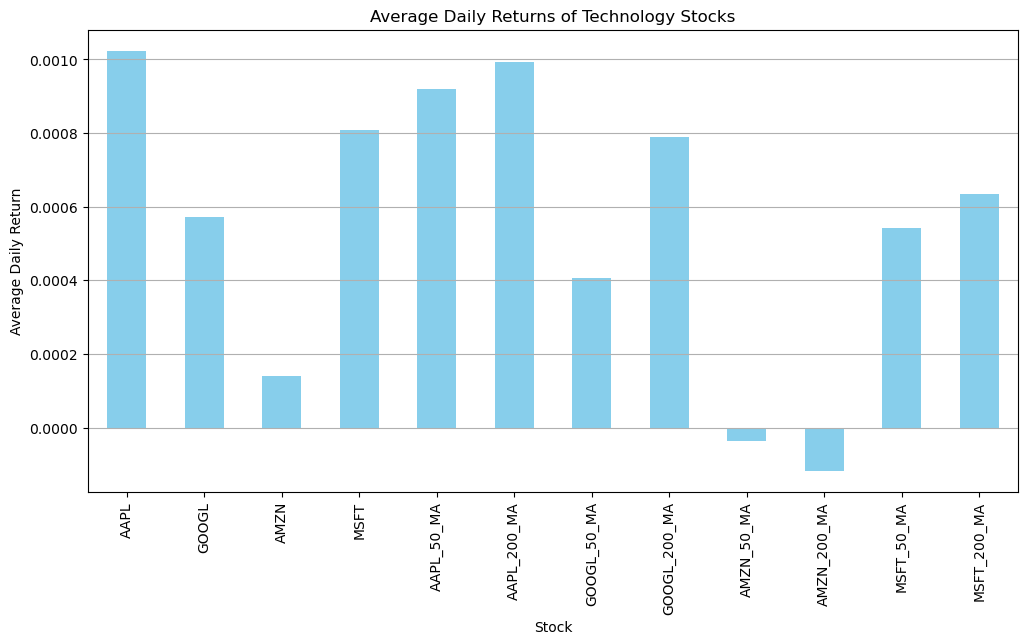

In [44]:
for stock_symbol in tech_stocks:
    stock = yf.download(stock_symbol, start=start_date, end=end_date)
    stock_data[stock_symbol] = stock["Adj Close"]

#CALCULATING DAILY RETURN FOR EACH STOCK
daily_returns = stock_data.pct_change()

#CALCULATING DAILY RETURN AVERAGE FOR EACH STOCK
average_daily_return = daily_returns.mean()

#PRINT THE AVERAGE DAILY ROUTINE
print("Average Daily Returns:")
print(average_daily_return)

#PLOT THE AVERAGE DAILY ROUTINE
plt.figure(figsize=(12, 6))
average_daily_return.plot(kind='bar', color='skyblue')
plt.title("Average Daily Returns of Technology Stocks")
plt.xlabel("Stock")
plt.ylabel("Average Daily Return")
plt.grid(axis='y')
plt.show()


TASK 7:- Adda new column ‘Trend’ whose values are based on the 'Daily Return'.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                  AAPL      GOOGL       AMZN        MSFT  AAPL_50_MA  \
Date                                                                   
2020-01-02   73.249023  68.433998  94.900497  155.093689         NaN   
2020-01-03   72.536888  68.075996  93.748497  153.162506         NaN   
2020-01-06   73.114883  69.890503  95.143997  153.558380         NaN   
2020-01-07   72.771027  69.755501  95.343002  152.158264         NaN   
2020-01-08   73.941650  70.251999  94.598503  154.581909         NaN   
...                ...        ...        ...         ...         ...   
2022-12-23  131.299820  89.230003  85.250000  237.112076  143.446968   
2022-12-27  129.477585  87.389999  83.040001  235.354095  143.285241   
2022

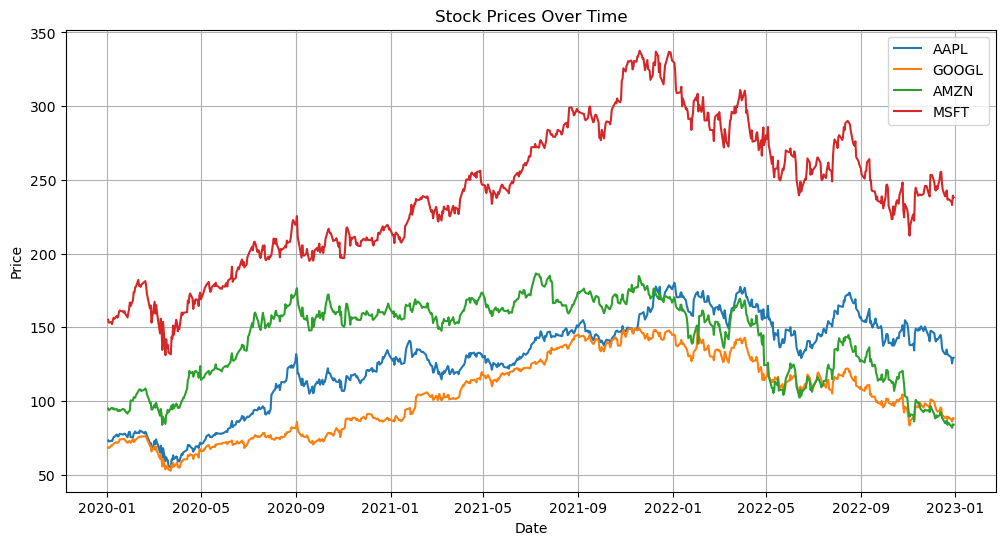

In [47]:
for stock_symbol in tech_stocks:
    stock = yf.download(stock_symbol, start=start_date, end=end_date)
    stock_data[stock_symbol] = stock["Adj Close"]

#CREATE A NEW COLUMN 'TREND' BASED ON DAILY RETURN
stock_data["Trend"] = "Neutral"  # Initialize all rows as "Neutral"

#UPDATE 'TREND' COLUMN BASED ON DAILY RETURN
for stock_symboil n tech_stocks:
    stock_data.loc[daily_returns[stock_symbol] > 0, "Trend"] = "Up"
    stock_data.loc[daily_returns[stock_symbol] < 0, "Trend"] = "Down"

#PRINT DATAFRAME WITH 'TREND' COLUMN
print(stock_data)

#PLOT THE 'TREND' COLUMN VALUES
plt.figure(figsize=(12, 6))
for stock_symbol in tech_stocks:
    plt.plot(stock_data.index, stock_data[stock_symbol], label=stock_symbol)

plt.title("Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

TASK 8:- Visualize trend frequency through a Pie Chart.

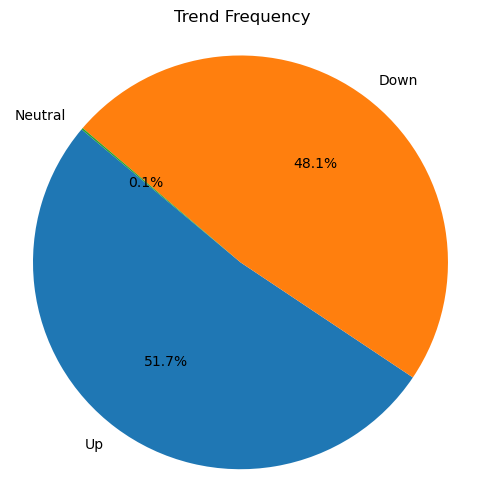

In [49]:
#UPDATE 'TREND' COLUMN BASED ON DAILY RETURN
for stock_symbol in tech_stocks:
    stock_data.loc[daily_returns[stock_symbol] > 0, "Trend"] = "Up"
    stock_data.loc[daily_returns[stock_symbol] < 0, "Trend"] = "Down"
    
#CALCULATING THE FREQUENCY OF EACH TREND CATEGORY
trend_counts = stock_data["Trend"].value_counts()

#PLOTTING THE TREND FREQUENCY THROUGH PIE CHART
plt.figure(figsize=(6, 6))
plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Trend Frequency")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

TASK 9:- What was the correlation between the daily returns of different stocks?

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Correlation Matrix of Daily Returns:
                  AAPL     GOOGL      AMZN      MSFT  AAPL_50_MA  AAPL_200_MA  \
AAPL          1.000000  0.730438  0.663193  0.811363    0.121956     0.077878   
GOOGL         0.730438  1.000000  0.679468  0.830213    0.050917     0.093121   
AMZN          0.663193  0.679468  1.000000  0.701370    0.058860     0.059924   
MSFT          0.811363  0.830213  0.701370  1.000000    0.042481     0.043247   
AAPL_50_MA    0.121956  0.050917  0.058860  0.042481    1.000000     0.536692   
AAPL_200_MA   0.077878  0.093121  0.059924  0.043247    0.536692     1.000000   
GOOGL_50_MA   0.108054  0.115156  0.090498  0.076535    0.651823     0.668166   
GOOGL_200_MA  0.080070  0.114874  0.076

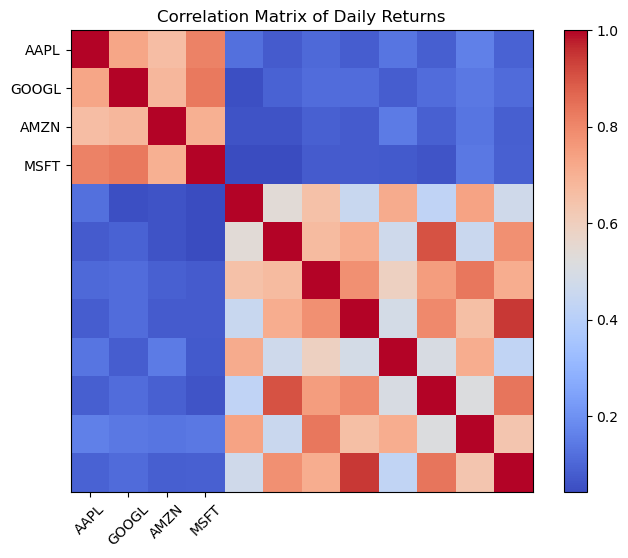

In [50]:
for stock_symbol in tech_stocks:
    stock = yf.download(stock_symbol, start=start_date, end=end_date)
    stock_data[stock_symbol] = stock["Adj Close"]
    
# Calculate the correlation matrix of daily returns
correlation_matrix = daily_returns.corr()

# Print the correlation matrix
print("Correlation Matrix of Daily Returns:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(tech_stocks)), tech_stocks, rotation=45)
plt.yticks(range(len(tech_stocks)), tech_stocks)
plt.title("Correlation Matrix of Daily Returns")
plt.show()